In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import random

In [4]:
class arms:
    def __init__(me,delta,T):
        me.arm1=random.normal(loc=0, scale=1, size=T)
        me.arm2=random.normal(loc=delta, scale=1, size=T)
        
    def getarms(me):
        return [me.arm1,me.arm2]
    def getloss(me, it):
        return [me.arm1[it],me.arm2[it]]

In [5]:
class newbandits:
    def __init__(me,alpha):
        me.mean1=0
        me.count1=0
        me.ucb1=0
        #___________________
        me.mean2=0
        me.count2=0
        me.ucb2=0
        me.alpha=alpha
    
    def update(me,loss,arm,t):
        T=10000
        #update after t for t+1
        if arm==1:
            updt= me.mean1*me.count1+loss
            me.count1+=1
            me.mean1=updt/me.count1
            #___________________
            me.ucb1= me.mean1+np.sqrt(me.alpha*np.log(T)/(me.count1))
        
        elif arm==2: 
            updt= me.mean1*me.count2+loss
            me.count2+=1
            me.mean2=updt/me.count2
            #___________________
            me.ucb2= me.mean2+np.sqrt(me.alpha*np.log(T)/(me.count2))
        else:
            pass
            
    def fullupdate(me,lossvec,t):
        me.update(lossvec[0],1,t)
        me.update(lossvec[1],2,t)
    
    def getUCB(me):
        return [me.ucb1, me.ucb2]
        
    def returnarm(me):
        return me.mean1, me.mean2

UCB 

In [6]:
def UCB(alpha,T=1000,arms=[0 for k in range(1000)]):
    loss=0
    loss1=0
    loss2=0
    regretbound=[]
    arm=arms
    known_bandits=newbandits(alpha)
    chk=0
    for t in range(1,T+1):
        lossvec=np.array(arm.getloss(t-1))
        lossvec=1-lossvec
        loss1+=lossvec[0]
        loss2+=lossvec[1]
        #_______
        if t<=2:
            i=t
            loss+=lossvec[i-1]
            known_bandits.update(lossvec[i-1],i,t)
            regretbound.append(np.amax([loss1,loss2]-loss))
        else:
            i=np.argmax(known_bandits.getUCB())+1
            if chk==0:
#                 print(i)
                chk=1
            loss+=lossvec[i-1]
            known_bandits.update(lossvec[i-1],i,t)
            regretbound.append(np.amax([loss1,loss2]-loss))
#     print(i)
#     print(known_bandits.returnarm())
#     print(known_bandits.getUCB())
#     print([known_bandits.count1,known_bandits.count2])
#     print([loss1,loss2,loss])
#     print(full_bandits.returnarm())
#     print(full_bandits.getUCB())
#     print([full_bandits.count1,full_bandits.count2])
#     regret=loss- np.amin([loss1,loss2])
#     print(regret)
#     print(regretbound)
    return regretbound
        
        
        
    

In [7]:
def arand(T,arm):
    loss=0
    loss1=0
    loss2=0
    regretbound=[]
    for t in range(1,T+1):
        lossvec=arm.getloss(t-1)
        #____
        loss1-=lossvec[0]
        loss2-=lossvec[1]
        #_______%2+1
        i=t%2+1
        loss-=lossvec[i-1]
        regretbound.append(loss- np.amin([loss1,loss2]))
       
    return regretbound

In [8]:
arm=arms(0.1,10000)
lossvec=np.array(arm.getloss(0))
lossvec=1-lossvec
loss1=lossvec[0]
loss2=lossvec[1]
# plt.plot(UCB(1,10000,ARM))

In [196]:
arm.getloss(0),lossvec

([-0.21603428993250426, -1.4809822217814983], array([1.21603429, 2.48098222]))

In [9]:
from tqdm import tqdm
medianu=[0 for i in range (10000)]
maxiu=[0 for i in range(10000)]
miniu=[0 for i in range(10000)]
medianr=[0 for i in range (10000)]
itera=10
for i in tqdm(range(itera)):
    arm=arms(0.1,10000)
    reg=UCB(0.5,10000,arm)
    maxi=UCB(1,10000,arm)
    mini=UCB(0.02,10000,arm)
    med=arand(10000,arm)
    for j in range(10000):
#         print(medianu,reg)
        medianu[j]+=reg[j]
        medianr[j]+=med[j]
        miniu[j]+=mini[j]
        maxiu[j]+=maxi[j]

for i in range(10000):
    medianu[i]=medianu[i]/itera
    medianr[i]=medianr[i]/itera
    maxiu[i]= maxiu[i]/itera
    miniu[i]=miniu[i]/itera

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.16it/s]


Text(0, 0.5, 'Regret')

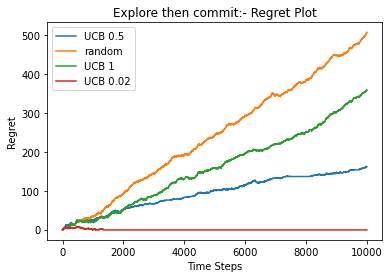

In [10]:
import matplotlib.pyplot as plt
plt.plot(medianu, label='UCB 0.5')
plt.plot(medianr, label='random')
plt.plot(maxiu, label='UCB 1')
plt.plot(miniu, label='UCB 0.02')
plt.legend(loc='best')
plt.title("Explore then commit:- Regret Plot")
plt.xlabel('Time Steps')
plt.ylabel('Regret')

In [89]:
np.argmax([-1,-20])

0

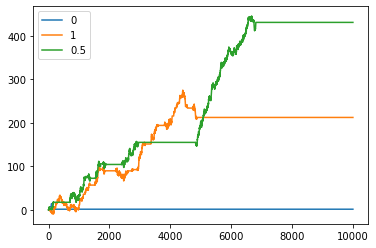

In [149]:
arma=arms(0.1,10000)
a=UCB(0,10000,arma)
b=UCB(1,10000,arma)
c=UCB(0.5,10000,arma)
plt.plot(a,label='0')
plt.plot(b,label='1')
plt.plot(c,label='0.5')
plt.legend(loc='best')
plt.show()

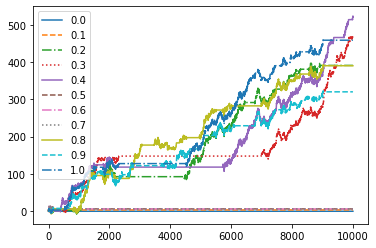

In [143]:
arma=arms(0.1,10000)
# UCB(1,10000,arma)
linestyles = ['-', '--', '-.', ':']
for i in range(11):
    j=(i)/10
    plt.plot(UCB(j,10000,arma),label=str(j),linestyle=linestyles[i%4])
plt.legend(loc='best')
plt.show()